ML@Cezeaux

### Machine Learning Tutorial

# Supervised Learning: regression - II
by [Emille Ishida](https://www.emilleishida.com/)

### *Take home message 4: representativeness matters!*

**Goal:** Explore the performance of ML algorithms in different data conditions

**Task**: Estimate the redshift based on photometric magnitudes  

**Data**: Extract from the [Teddy photometric redshift catalog](https://github.com/COINtoolbox/photoz_catalogues)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;First presented by [Beck et al., 2017, MNRAS, 468 (4323)](https://cosmostatistics-initiative.org/portfolio-item/representativeness-photoz/)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5000 objects for training (teddy_A)   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5000 objects for testing (teddy_C)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5000 objects for testing (teddy_D)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Features:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$mag\_r$: standardized r-band magnitude  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$u-g$: standardized SDSS u-g color  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$g-r$: standardized SDSS g-r color  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$r-i$: standardized SDSS r-i color  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$i-z$: standardized SDSS i-z color  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$z\_spec$: spectroscopic redshift (label)  

In [1]:
# import some basic libaries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

## Step 1: Get the data

As we already worked we with the training data before, we will go to the training directly.  

PS: this is almost never a good idea!

In [2]:
# read the training data
data_train = pd.read_csv('../../data/teddy_A.csv')

We see from the documentation that the test data is given in a separate file.  
As a consequence, we only need to split the training data intro train and validation.

In [3]:
# separate 80% for training and 20% for testing
X_train, X_validation, y_train, y_validation = \
train_test_split(data_train[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']], data_train['z_spec'], test_size=0.2, random_state=1)

We will now load three different test sets...

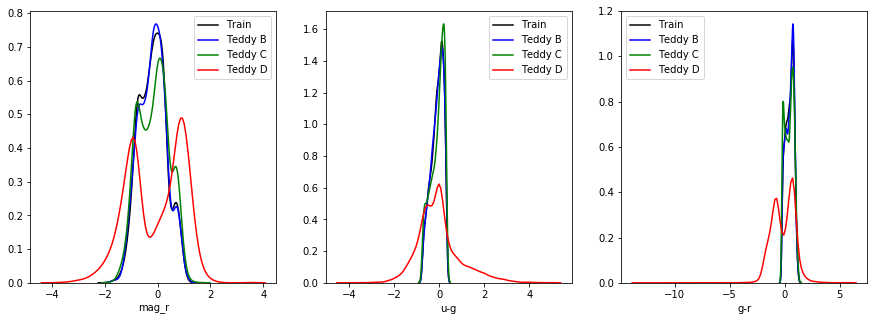

In [4]:
# read  test sample
teddy_b = pd.read_csv('../../data/teddy_B.csv')
teddy_c = pd.read_csv('../../data/teddy_C.csv')
teddy_d = pd.read_csv('../../data/teddy_D.csv')

# visualize the data
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(data_train['mag_r'], hist=False, color='black', label='Train')
sns.distplot(teddy_b['mag_r'], hist=False, color='b', label='Teddy B')
sns.distplot(teddy_c['mag_r'], hist=False, color='g', label='Teddy C')
sns.distplot(teddy_d['mag_r'], hist=False, color='r', label='Teddy D')
plt.xlabel('mag_r')

plt.subplot(1,3,2)
sns.distplot(data_train['u-g'], hist=False, color='black', label='Train')
sns.distplot(teddy_b['u-g'], hist=False, color='b', label='Teddy B')
sns.distplot(teddy_c['u-g'], hist=False, color='g', label='Teddy C')
sns.distplot(teddy_d['u-g'], hist=False, color='r', label='Teddy D')
plt.xlabel('u-g')

plt.subplot(1,3,3)
sns.distplot(data_train['g-r'], hist=False, color='black', label='Train')
sns.distplot(teddy_b['g-r'], hist=False, color='b', label='Teddy B')
sns.distplot(teddy_c['g-r'], hist=False, color='g', label='Teddy C')
sns.distplot(teddy_d['g-r'], hist=False, color='r', label='Teddy D')
plt.xlabel('g-r')

plt.show()

**Looking at this plots, what are your expectations?**

### Step 2: train a few classifiers

Using [scikit-learn](https://scikit-learn.org/stable/) we are able to quickly train a set of algorithms: 


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.a) [Linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html):

In [5]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# train
regr.fit(X_train, y_train)

# estimate the photoz
photoz_linear_val = regr.predict(X_validation)

# quality of the fit
R2_linear_val = regr.score(X_validation, y_validation)
R2_linear_val

0.8171473907261236

In [6]:
# estimate the photoz
linear_teddyb = regr.predict(teddy_b[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']])
linear_teddyc = regr.predict(teddy_c[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']])
linear_teddyd = regr.predict(teddy_d[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']])

# quality of the fit
R2_linear_teddyb = regr.score(teddy_b[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']], teddy_b[['z_spec']])
R2_linear_teddyc = regr.score(teddy_c[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']], teddy_c[['z_spec']])
R2_linear_teddyd = regr.score(teddy_d[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']], teddy_d[['z_spec']])

Compare results

In [7]:
print(' Linear regression results')
print('Teddy B: ', R2_linear_teddyb)
print('Teddy C: ', R2_linear_teddyc)
print('Teddy D: ', R2_linear_teddyd)

 Linear regression results
Teddy B:  0.8086652420908533
Teddy C:  0.8381901953506636
Teddy D:  0.8544789592602585


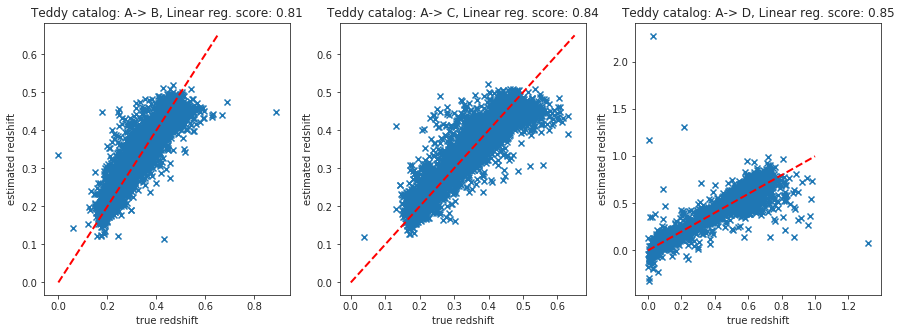

In [8]:
# plot result
sns.set_style('ticks')
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Teddy catalog: A-> B, Linear reg. score: ' + str(round(R2_linear_teddyb,2)))
plt.scatter(teddy_b[['z_spec']], linear_teddyb, marker='x')
plt.plot([0,0.65], [0,0.65], color='red', lw=2, ls='--')
plt.xlabel('true redshift')
plt.ylabel('estimated redshift')

plt.subplot(1,3,2)
plt.title('Teddy catalog: A-> C, Linear reg. score: ' + str(round(R2_linear_teddyc,2)))
plt.scatter(teddy_c[['z_spec']], linear_teddyc, marker='x')
plt.plot([0,0.65], [0,0.65], color='red', lw=2, ls='--')
plt.xlabel('true redshift')
plt.ylabel('estimated redshift')

plt.subplot(1,3,3)
plt.title('Teddy catalog: A-> D, Linear reg. score: ' + str(round(R2_linear_teddyd,2)))
plt.scatter(teddy_d[['z_spec']], linear_teddyd, marker='x')
plt.plot([0,1], [0,1], color='red', lw=2, ls='--')
plt.xlabel('true redshift')
plt.ylabel('estimated redshift')
plt.show()

Check why the scores for Teddy D are higher despite of the obvious outliers: [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.b) [Nearest Neighbor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html):

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Here we have a little more room for improvement.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Try changing the number of neighbors, or other parameters (check documentation), to improve the quality of the fit. 

In [9]:
from sklearn.neighbors import KNeighborsRegressor

# choose number of neighbors
nn = 9

# initiate a KNN instance
knn = KNeighborsRegressor(n_neighbors=nn)

# fit the model using training data
knn.fit(X_train, y_train)

# estimate photometric redshift for the validation data
photoz_knn_validation = knn.predict(X_validation)

# quality of the fit
R2_knn_val = knn.score(X_validation, y_validation)
R2_knn_val

0.8471992477625828

Once you are happy with the optimization, estimate the photometric redshift values for the test sample:

In [10]:
# estimate the photoz
knn_teddyb = knn.predict(teddy_b[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']])
knn_teddyc = knn.predict(teddy_c[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']])
knn_teddyd = knn.predict(teddy_d[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']])

# quality of the fit
R2_knn_teddyb = knn.score(teddy_b[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']], teddy_b[['z_spec']])
R2_knn_teddyc = knn.score(teddy_c[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']], teddy_c[['z_spec']])
R2_knn_teddyd = knn.score(teddy_d[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']], teddy_d[['z_spec']])

Compare results

In [11]:
print(' KNN regression results')
print('Teddy B: ', R2_knn_teddyb)
print('Teddy C: ', R2_knn_teddyc)
print('Teddy D: ', R2_knn_teddyd)

 KNN regression results
Teddy B:  0.8395832000152723
Teddy C:  0.8602978288066706
Teddy D:  0.7505240007361634


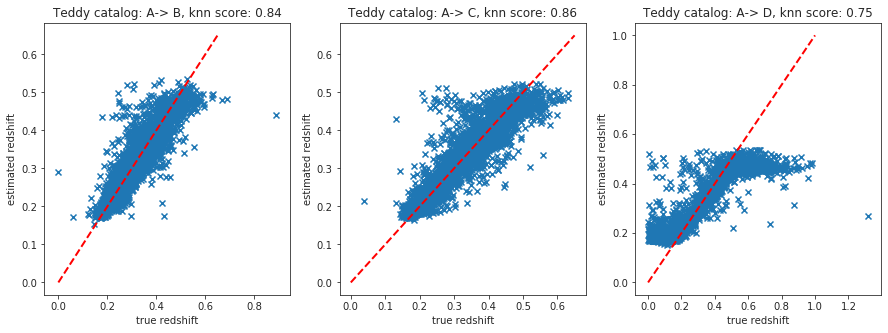

In [12]:
# plot result
sns.set_style('ticks')
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Teddy catalog: A-> B, knn score: ' + str(round(R2_knn_teddyb,2)))
plt.scatter(teddy_b[['z_spec']], knn_teddyb, marker='x')
plt.plot([0,0.65], [0,0.65], color='red', lw=2, ls='--')
plt.xlabel('true redshift')
plt.ylabel('estimated redshift')

plt.subplot(1,3,2)
plt.title('Teddy catalog: A-> C, knn score: ' + str(round(R2_knn_teddyc,2)))
plt.scatter(teddy_c[['z_spec']], knn_teddyc, marker='x')
plt.plot([0,0.65], [0,0.65], color='red', lw=2, ls='--')
plt.xlabel('true redshift')
plt.ylabel('estimated redshift')

plt.subplot(1,3,3)
plt.title('Teddy catalog: A-> D, knn score: ' + str(round(R2_knn_teddyd,2)))
plt.scatter(teddy_d[['z_spec']], knn_teddyd, marker='x')
plt.plot([0,1], [0,1], color='red', lw=2, ls='--')
plt.xlabel('true redshift')
plt.ylabel('estimated redshift')
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.c) [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html):

Here we have still more freedom. To begin with, try playing with the number of trees in your forest and the maximum depth allowed for each tree.  
**How do your regression results change?**

In [13]:
from sklearn.ensemble import RandomForestRegressor

# choose number of trees in the forest
n_trees = 100

# define maximum depth, None=> split continues until the leafs are pure
depth = 8

# initiate a Random Forest instance
randfor = RandomForestRegressor(max_depth=depth, n_estimators=n_trees)

# train the model
randfor.fit(X_train, y_train)

# estimate the photometric redshift for the validation sample
photoz_randforest_validation = randfor.predict(X_validation)

# quality of the fit
R2_randforest_val = randfor.score(X_validation, y_validation)
R2_randforest_val

0.8585837870949237

If you are satisfied, see how your regression perform in the test sample:

In [14]:
# estimate the photoz
randfor_teddyb = randfor.predict(teddy_b[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']])
randfor_teddyc = randfor.predict(teddy_c[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']])
randfor_teddyd = randfor.predict(teddy_d[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']])

# quality of the fit
R2_randfor_teddyb = randfor.score(teddy_b[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']], teddy_b[['z_spec']])
R2_randfor_teddyc = randfor.score(teddy_c[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']], teddy_c[['z_spec']])
R2_randfor_teddyd = randfor.score(teddy_d[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']], teddy_d[['z_spec']])

Compare results

In [15]:
print(' Random Forest regression results')
print('Teddy B: ', R2_randfor_teddyb)
print('Teddy C: ', R2_randfor_teddyc)
print('Teddy D: ', R2_randfor_teddyd)

 Random Forest regression results
Teddy B:  0.8399517769939135
Teddy C:  0.8662520881061531
Teddy D:  0.7047219672443095


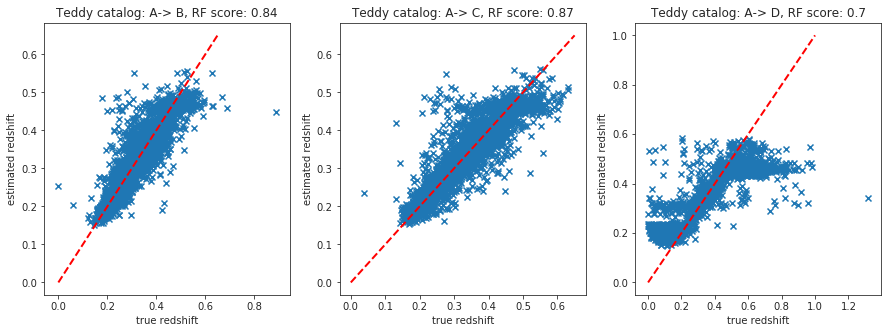

In [16]:
# plot result
sns.set_style('ticks')
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Teddy catalog: A-> B, RF score: ' + str(round(R2_randfor_teddyb,2)))
plt.scatter(teddy_b[['z_spec']], randfor_teddyb, marker='x')
plt.plot([0,0.65], [0,0.65], color='red', lw=2, ls='--')
plt.xlabel('true redshift')
plt.ylabel('estimated redshift')

plt.subplot(1,3,2)
plt.title('Teddy catalog: A-> C, RF score: ' + str(round(R2_randfor_teddyc,2)))
plt.scatter(teddy_c[['z_spec']], randfor_teddyc, marker='x')
plt.plot([0,0.65], [0,0.65], color='red', lw=2, ls='--')
plt.xlabel('true redshift')
plt.ylabel('estimated redshift')

plt.subplot(1,3,3)
plt.title('Teddy catalog: A-> D, RF score: ' + str(round(R2_randfor_teddyd,2)))
plt.scatter(teddy_d[['z_spec']], randfor_teddyd, marker='x')
plt.plot([0,1], [0,1], color='red', lw=2, ls='--')
plt.xlabel('true redshift')
plt.ylabel('estimated redshift')
plt.show()